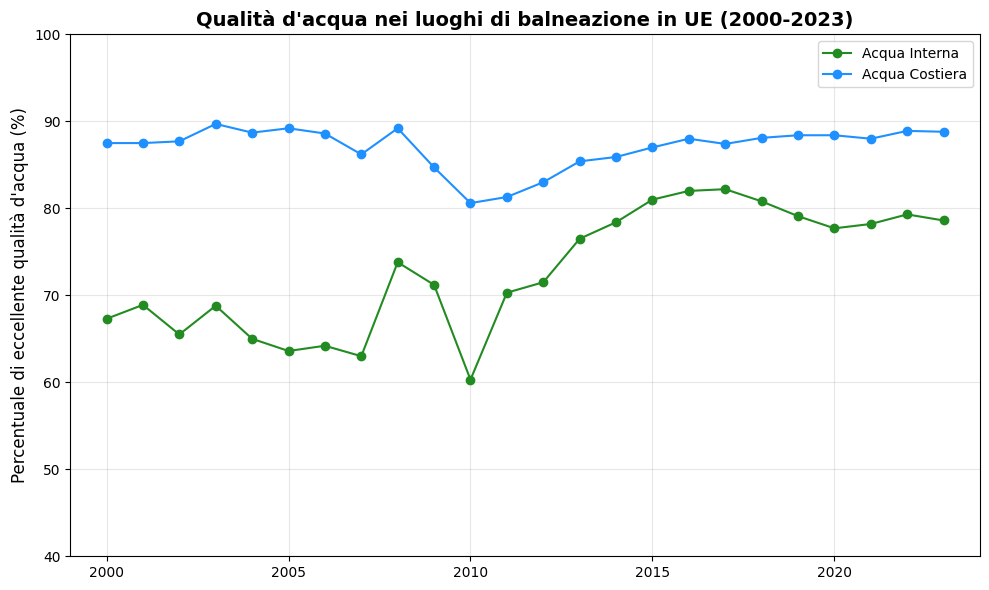

In [1]:
#Grafico a linee per i luoghi di balneazione di:
# acque interne (riferito a zone lontane dalla costa, come laghi, fiumi e altre acque interne)
# acque acque costiere (relativo alla costa, quindi alle acque vicino alla riva o alla zona costiera)
# di eccellente qualità in UE (in percentuale)

import pandas as pd
import matplotlib.pyplot as plt

# Carica il CSV con il separatore corretto
data_inl = pd.read_csv("/home/mile/progetto VS/Dataset/inquinamento idrico/eea_balneazione_ottima_20-23/INL_EXC_Percentage.csv", sep=',')
data_cst = pd.read_csv("/home/mile/progetto VS/Dataset/inquinamento idrico/eea_balneazione_ottima_20-23/CST_EXC_Percentage.csv", sep=',')
# Filtra i dati per 'geo' = 'EU27_2020'
countrie = ['EU27_2020']
data_inl_ue27 = data_inl[data_inl['geo'].isin(countrie)]
data_cst_ue27 = data_cst[data_cst['geo'].isin(countrie)]
# Pivot dei dati per ottenere le fonti come colonne per inland e coastal water
data_pivot_inland = data_inl_ue27[data_inl_ue27['dimension_label'] == 'Percentage of bathing sites - excellent quality ii. inland water'].pivot_table(index='time', values='obs_value')
data_pivot_coastal = data_cst_ue27[data_cst_ue27['dimension_label'] == 'Percentage of bathing sites - excellent quality i. coastal water'].pivot_table(index='time', values='obs_value')

# Creazione del grafico con due linee
plt.figure(figsize=(10, 6))

# Traccia la linea per inland water
plt.plot(data_pivot_inland.index, data_pivot_inland.values, marker='o', color='forestgreen', label='Acqua Interna')

# Traccia la linea per coastal water
plt.plot(data_pivot_coastal.index, data_pivot_coastal.values, marker='o', color='dodgerblue', label='Acqua Costiera')

# Aggiungi titolo, etichette e limiti degli assi
plt.title('Qualità d\'acqua nei luoghi di balneazione in UE (2000-2023)', fontsize=14, fontweight='bold')
plt.ylabel('Percentuale di eccellente qualità d\'acqua (%)', fontsize=12)
plt.grid(True, alpha=0.30)
plt.xticks(rotation=0)
plt.ylim(40, 100)
plt.xlim(1999, 2024)

# Aggiungi legenda
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


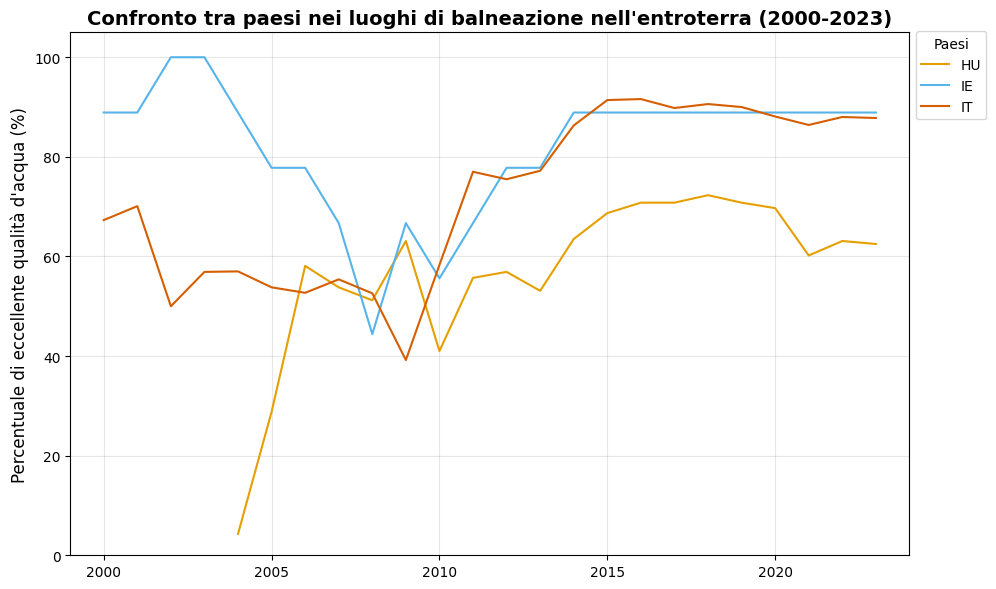

In [2]:
# Importa librerie
import seaborn as sns

# Seleziona l'UE e i paesi desiderati
countries = ['HU', 'IE', 'IT']

# Filtra i dati per i paesi selezionati da 2000 a 2023 
data_filtered = data_inl[data_inl['geo'].isin(countries) & 
                         ((data_inl['time'] >= 2000) & (data_inl['time'] <= 2023))]

# Crea il grafico a dispersione
plt.figure(figsize=(10, 6))

# Personalizza una palette colorblind escludendo blu, giallo e verde
custom_palette = ['#E69F00', '#56B4E9', '#D55E00']  # Arancione, Azzurro chiaro, Rosso

# Associa i colori ai paesi
for country, color in zip(countries, custom_palette):
    country_data = data_filtered[data_filtered['geo'] == country]
    plt.plot(country_data['time'], country_data['obs_value'], label=country, color=color)

# Aggiungi titolo e etichette
plt.title("Confronto tra paesi nei luoghi di balneazione nell'entroterra (2000-2023)", fontsize=14, fontweight='bold')
plt.ylabel("Percentuale di eccellente qualità d'acqua (%)", fontsize=12)
plt.grid(True, alpha=0.30)
plt.xticks(rotation=0)
plt.ylim(0, 105)
plt.xlim(1999, 2024)

# Aggiungi la legenda per i paesi
plt.legend(title="Paesi", bbox_to_anchor=(1.1, 1.015))

plt.tight_layout()
plt.show()


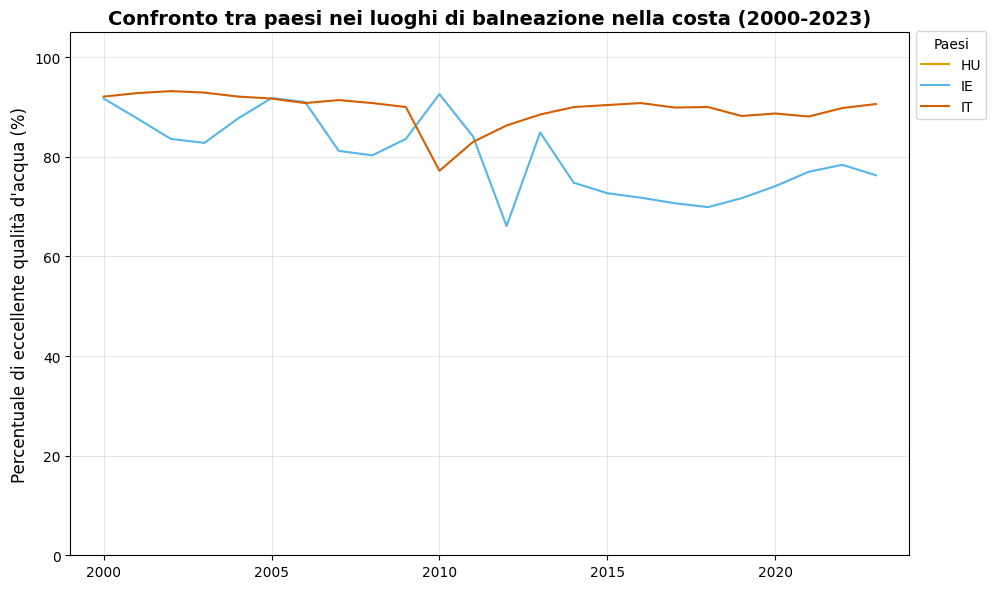

In [3]:
# Filtra i dati per i paesi selezionati da 2000 a 2023 
data_filtered = data_cst[data_cst['geo'].isin(countries) & 
                         ((data_cst['time'] >= 2000) & (data_cst['time'] <= 2023))]

# Crea il grafico a dispersione
plt.figure(figsize=(10, 6))

# Associa i colori ai paesi
for country, color in zip(countries, custom_palette):
    country_data = data_filtered[data_filtered['geo'] == country]
    plt.plot(country_data['time'], country_data['obs_value'], label=country, color=color)

# Aggiungi titolo e etichette
plt.title("Confronto tra paesi nei luoghi di balneazione nella costa (2000-2023)", fontsize=14, fontweight='bold')
plt.ylabel("Percentuale di eccellente qualità d'acqua (%)", fontsize=12)
plt.grid(True, alpha=0.30)
plt.xticks(rotation=0)
plt.ylim(0, 105)
plt.xlim(1999, 2024)

# Aggiungi la legenda per i paesi
plt.legend(title="Paesi", bbox_to_anchor=(1.1, 1.015))

plt.tight_layout()
plt.show()